<a href="https://colab.research.google.com/github/arsonor/machine-learning-zoomcamp/blob/main/Introduction_and_Data_Sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# 1) Understanding Data-Driven Decisions data pulls

In [3]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 9; day=20
Period for indexes: 1954-09-20 to 2024-09-20 


## 1.1) GDP

In [4]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [5]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-07-01,22338.77,0.020372,0.005003
2023-10-01,22452.06,0.020331,0.005071
2024-01-01,22566.61,0.020357,0.005102
2024-04-01,22682.66,0.020474,0.005143
2024-07-01,22800.63,0.020675,0.005201


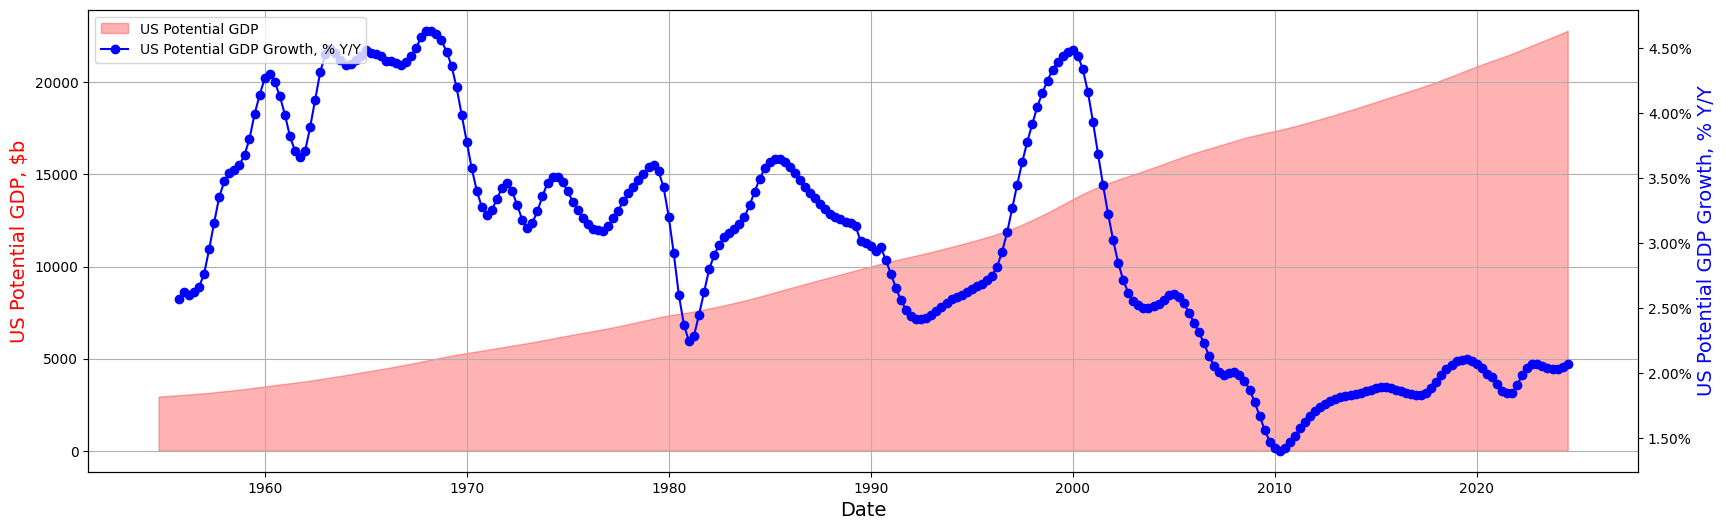

In [6]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.2) Inflation - CPI Core

In [7]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [8]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2023-08-01,309.656,0.044128,0.002301
2023-09-01,310.644,0.041437,0.003191
2023-10-01,311.390,0.040217,0.002401
2023-11-01,312.349,0.040151,0.003080
2023-12-01,313.209,0.039101,0.002753
2024-01-01,314.438,0.038747,0.003924
2024-02-01,315.565,0.037620,0.003584
2024-03-01,316.698,0.037973,0.003590
2024-04-01,317.622,0.036155,0.002918


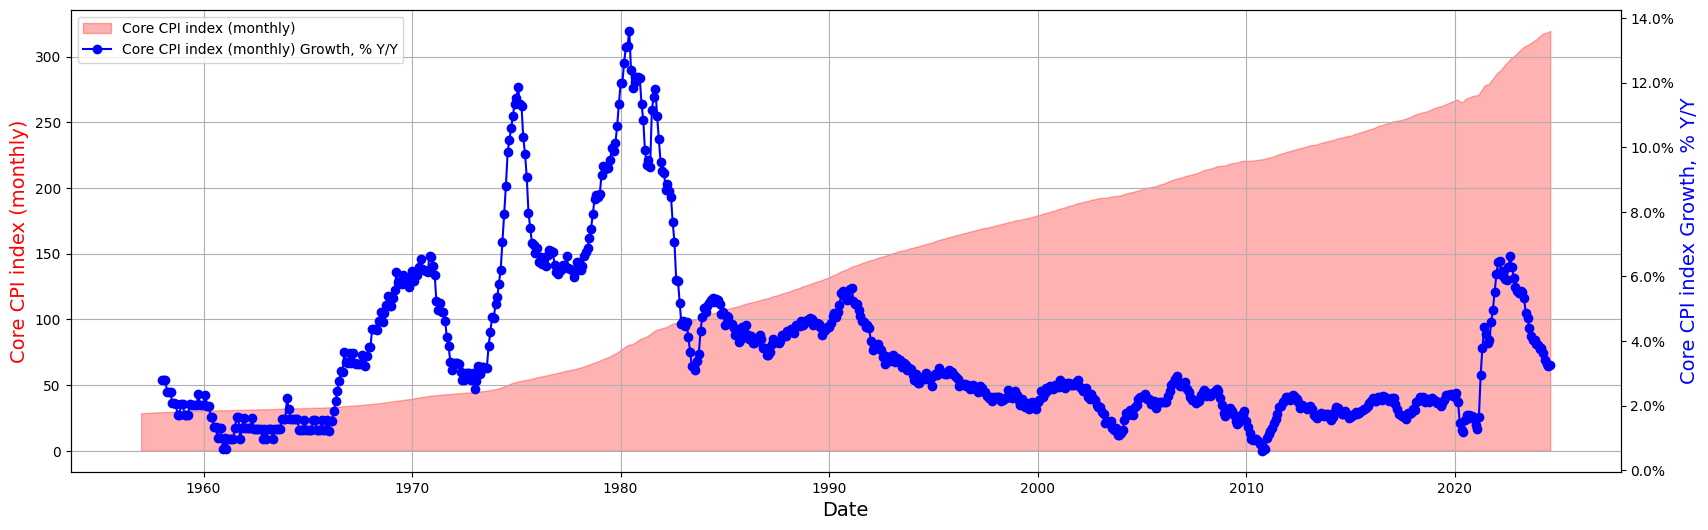

In [9]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.3 Interest rates

In [10]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail()

,FEDFUNDS
DATE,
2024-04-01,5.33
2024-05-01,5.33
2024-06-01,5.33
2024-07-01,5.33
2024-08-01,5.33


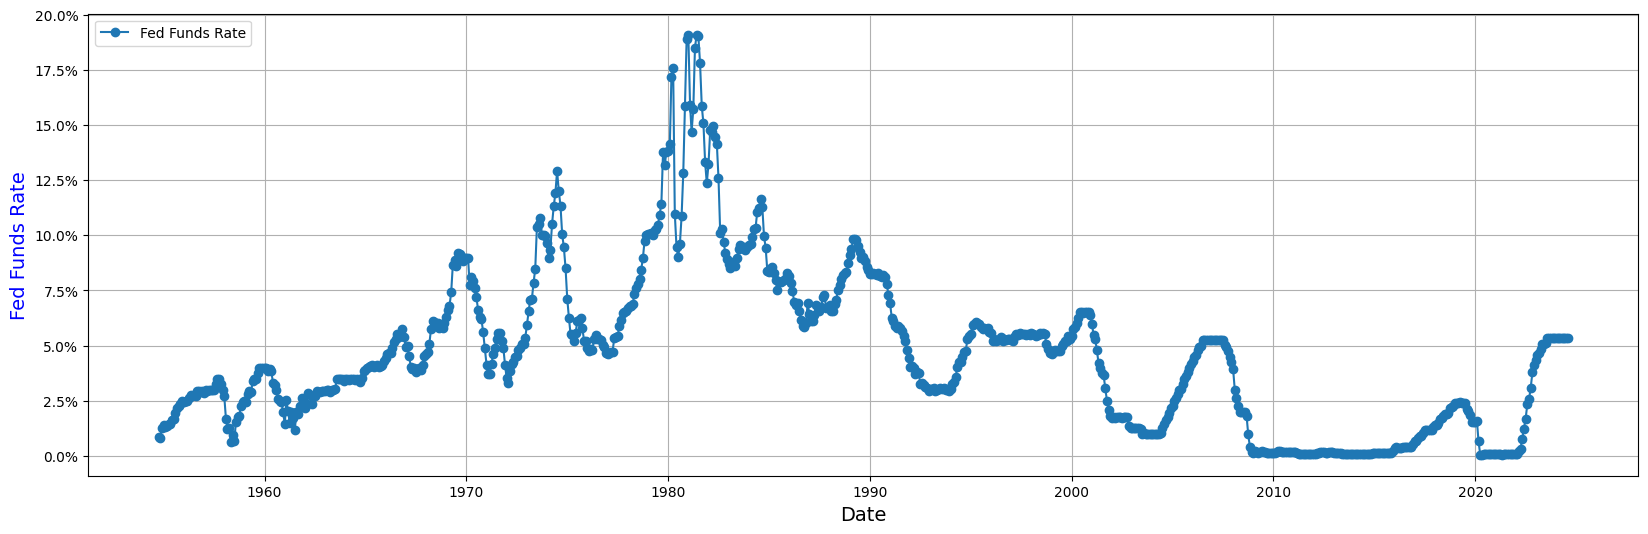

In [11]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [12]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2024-09-12,4.09
2024-09-13,4.00
2024-09-16,3.96
2024-09-17,3.99
2024-09-18,3.95


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115  
* https://fred.stlouisfed.org/series/DGS2
* https://fred.stlouisfed.org/series/DGS3
* https://fred.stlouisfed.org/series/DGS5
* https://fred.stlouisfed.org/series/DGS10
...

In [13]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2024-09-12,3.47
2024-09-13,3.43
2024-09-16,3.41
2024-09-17,3.44
2024-09-18,3.47


## 1.4 SNP500

In [14]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-19,5702.63,5733.57,5686.42,5713.64,2.797802e+09
2024-09-18,5641.68,5689.75,5615.08,5618.26,2.478223e+09
2024-09-17,5655.51,5670.81,5614.05,5634.58,2.352006e+09
2024-09-16,5615.21,5636.05,5604.53,5633.09,2.355704e+09
2024-09-13,5603.34,5636.27,5601.65,5626.02,2.218002e+09


In [15]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [16]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2024-09-19,5702.63,5733.57,5686.42,5713.64,2.797802e+09,0.016977,0.043936,0.285712
2024-09-18,5641.68,5689.75,5615.08,5618.26,2.478223e+09,-0.002896,0.023916,0.261530
2024-09-17,5655.51,5670.81,5614.05,5634.58,2.352006e+09,0.000265,0.029480,0.266107
2024-09-16,5615.21,5636.05,5604.53,5633.09,2.355704e+09,0.001257,0.037096,0.250381
2024-09-13,5603.34,5636.27,5601.65,5626.02,2.218002e+09,0.005408,0.035386,0.259339


In [17]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

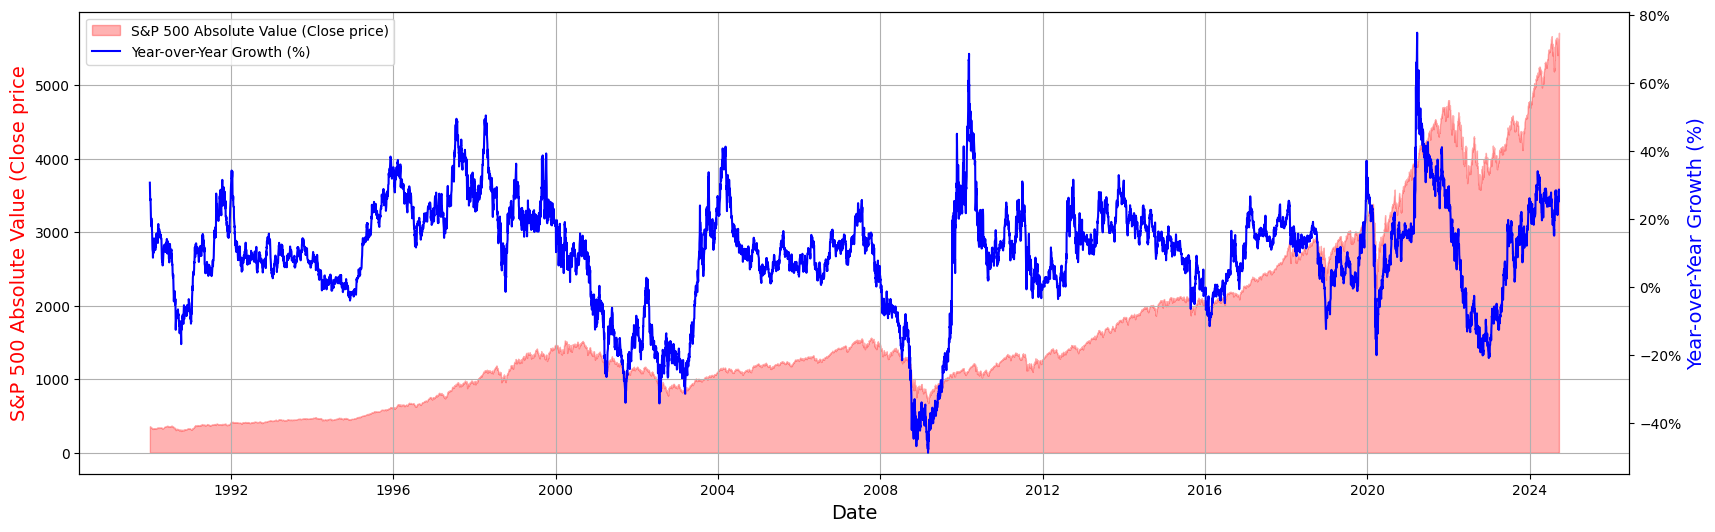

In [18]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# 2) Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

In [19]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
dax_daily = yf.download(tickers = "^GDAXI",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [20]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-16,18621.779297,18672.230469,18599.529297,18633.109375,18633.109375,51208600
2024-09-17,18686.759766,18805.089844,18671.640625,18726.080078,18726.080078,60260500
2024-09-18,18729.640625,18756.529297,18695.369141,18711.490234,18711.490234,56152800
2024-09-19,18877.570312,19044.960938,18806.160156,19002.380859,19002.380859,80223000
2024-09-20,18895.820312,18900.439453,18800.560547,18810.900391,18810.900391,0


In [21]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [22]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-09-16,18621.779297,18672.230469,18599.529297,18633.109375,18633.109375,51208600,15781.589844,0.180686
2024-09-17,18686.759766,18805.089844,18671.640625,18726.080078,18726.080078,60260500,15571.860352,0.202559
2024-09-18,18729.640625,18756.529297,18695.369141,18711.490234,18711.490234,56152800,15557.290039,0.202747


<Axes: xlabel='Date'>

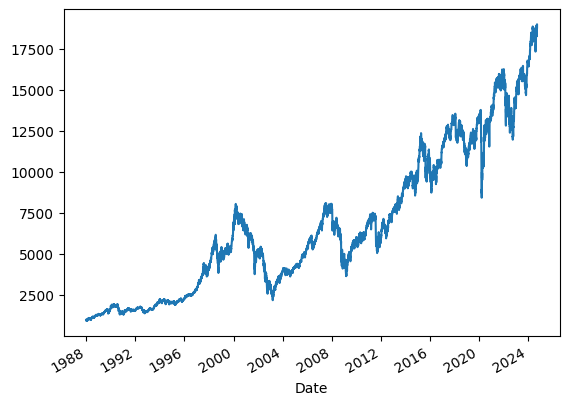

In [23]:
dax_daily['Adj Close'].plot.line()

In [24]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
snp500_daily = yf.download(tickers = "^SPX",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [25]:
snp500_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-13,5603.339844,5636.270020,5601.649902,5626.020020,5626.020020,3500790000
2024-09-16,5615.209961,5636.049805,5604.529785,5633.089844,5633.089844,3437070000
2024-09-17,5655.509766,5670.810059,5614.049805,5634.580078,5634.580078,3443600000
2024-09-18,5641.680176,5689.750000,5615.080078,5618.259766,5618.259766,3691390000
2024-09-19,0.000000,0.000000,0.000000,5713.640137,5713.640137,2797105044


In [26]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [27]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-16,5615.209961,5636.049805,5604.529785,5633.089844,5633.089844,3437070000
2024-09-17,5655.509766,5670.810059,5614.049805,5634.580078,5634.580078,3443600000
2024-09-18,5641.680176,5689.750000,5615.080078,5618.259766,5618.259766,3691390000
2024-09-19,5702.629883,5733.569824,5686.419922,5713.640137,5713.640137,4024530000
2024-09-20,5709.640137,5709.640137,5703.080078,5705.270020,5705.270020,331810284


In [28]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


## 2.2 OHLCV data daily - ETFs

In [29]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch
voo_etf = yf.download(tickers = "VOO",
                     period = "max",
                     interval = "1d")


[*********************100%***********************]  1 of 1 completed


In [30]:
voo_etf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-16,516.340027,517.590027,514.650024,517.349976,517.349976,4256300
2024-09-17,519.440002,520.739990,515.500000,517.590027,517.590027,8150000
2024-09-18,518.179993,522.729980,515.469971,515.909973,515.909973,6921300
2024-09-19,524.880005,526.599976,522.190002,524.909973,524.909973,5550200
2024-09-20,524.880005,523.909973,523.585571,523.849976,523.849976,167902


In [31]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [32]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4172, 6)


In [33]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[(epi_etf_daily.index >='2023-06-23') & (epi_etf_daily.index <='2023-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,34.029999,34.150002,33.930000,34.020000,33.960003,344100
2023-06-26,34.110001,34.160000,34.049999,34.080002,34.080002,634600
2023-06-27,34.279999,34.310001,34.230000,34.310001,34.310001,417100
2023-06-28,34.410000,34.529999,34.389999,34.529999,34.529999,454400


In [34]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2022-06-23') & (epi_etf_daily.index <='2022-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,31.129999,31.26,31.000000,31.200001,29.303230,607700
2022-06-24,29.549999,29.91,29.500000,29.900000,29.847267,387900
2022-06-27,29.799999,29.82,29.660000,29.709999,29.657600,225400
2022-06-28,29.709999,29.76,29.389999,29.420000,29.368114,466600


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

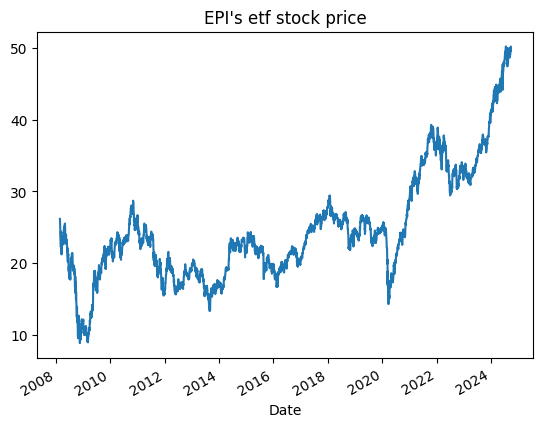

In [35]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [36]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [37]:
# get dividends as Series
epi.get_dividends()

,Dividends
Date,
2008-12-22 00:00:00-05:00,0.091
2009-03-23 00:00:00-04:00,0.007
2009-06-22 00:00:00-04:00,0.002
2009-09-21 00:00:00-04:00,0.045
2009-12-21 00:00:00-05:00,0.006
2010-06-28 00:00:00-04:00,0.065
2010-09-20 00:00:00-04:00,0.065
2010-12-22 00:00:00-05:00,0.013
2011-06-22 00:00:00-04:00,0.062


## 2.3 Paid data - Poligon.io (news endpoint)

In [38]:
# Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization

In [39]:
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

## 2.4 Macroeconomics

* add some indicator examples

In [40]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [41]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

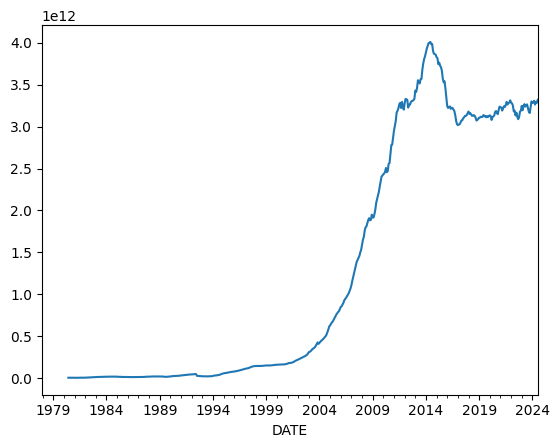

In [42]:
gold_reserves.TRESEGCNM052N.plot.line()

In [43]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

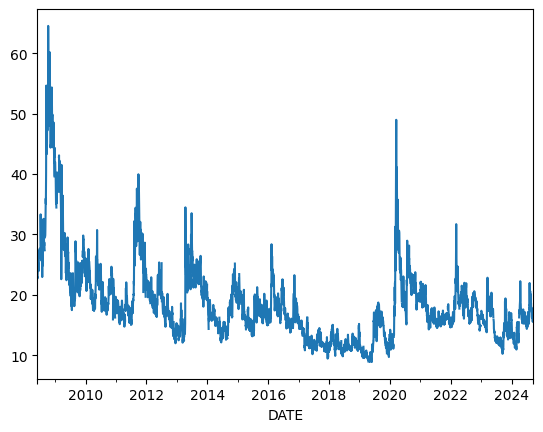

In [44]:
gold_volatility.GVZCLS.plot.line()

In [45]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

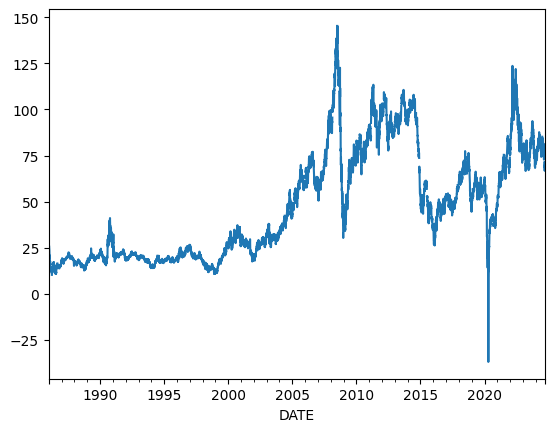

In [46]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [47]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

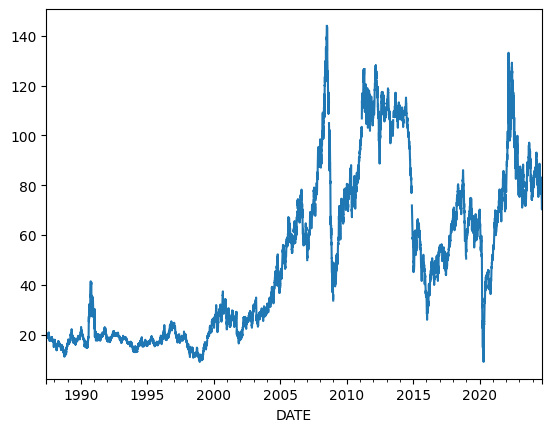

In [48]:
oil_brent.DCOILBRENTEU.plot.line()

In [49]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [50]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0     Last  Previous  Highest    Lowest  \
0                   Currency   101.00    101.00   165.00     70.70   
1               Stock Market  5698.00   5714.00  5734.00      4.40   
2            GDP Growth Rate     3.00      1.40    34.80    -28.00   
3     GDP Annual Growth Rate     3.10      2.90    13.40     -7.50   
4          Unemployment Rate     4.20      4.30    14.90      2.50   
5          Non Farm Payrolls   142.00     89.00  4615.00 -20477.00   
6             Inflation Rate     2.50      2.90    23.70    -15.80   
7         Inflation Rate MoM     0.20      0.20     2.00     -1.80   
8              Interest Rate     5.00      5.50    20.00      0.25   
9           Balance of Trade   -78.79    -73.02     1.95   -102.00   
10           Current Account  -267.00   -241.00     9.96   -292.00   
11    Current Account to GDP    -3.00     -3.80     0.20     -6.00   
12    Government Debt to GDP   122.00    122.00   126.00     31.80   
13         Governmen

<ipython-input-50-7e84ec23ab8e>:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list


In [51]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,101.00,101.00,165.00,70.70,NaN,Sep/24
1,Stock Market,5698.00,5714.00,5734.00,4.40,points,Sep/24
2,GDP Growth Rate,3.00,1.40,34.80,-28.00,percent,Jun/24
3,GDP Annual Growth Rate,3.10,2.90,13.40,-7.50,percent,Jun/24
4,Unemployment Rate,4.20,4.30,14.90,2.50,percent,Aug/24
5,Non Farm Payrolls,142.00,89.00,4615.00,-20477.00,Thousand,Aug/24
6,Inflation Rate,2.50,2.90,23.70,-15.80,percent,Aug/24
7,Inflation Rate MoM,0.20,0.20,2.00,-1.80,percent,Aug/24
8,Interest Rate,5.00,5.50,20.00,0.25,percent,Sep/24
9,Balance of Trade,-78.79,-73.02,1.95,-102.00,USD Billion,Jul/24


## 2.5) Financial reporting - EDGAR (in Yahoo)

In [52]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [53]:
# yearly financials for the last 4 years
nvda.financials


,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Tax Effect Of Unusual Items,0.0,-284130000.0,0.0,0.0
Tax Rate For Calcs,0.12,0.21,0.019,0.017
Normalized EBITDA,35583000000.0,7340000000.0,11351000000.0,5691000000.0
Total Unusual Items,0.0,-1353000000.0,0.0,0.0
Total Unusual Items Excluding Goodwill,0.0,-1353000000.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,29760000000.0,4368000000.0,9752000000.0,4332000000.0
Reconciled Depreciation,1508000000.0,1544000000.0,1174000000.0,1098000000.0
Reconciled Cost Of Revenue,16621000000.0,11618000000.0,9439000000.0,6279000000.0
EBITDA,35583000000.0,5987000000.0,11351000000.0,5691000000.0
EBIT,34075000000.0,4443000000.0,10177000000.0,4593000000.0


In [54]:
# balance sheet
nvda.balance_sheet

,2024-01-31,2023-01-31,2022-01-31,2021-01-31,2020-01-31
Treasury Shares Number,NaN,NaN,NaN,13800000000.0,13700576960.0
Ordinary Shares Number,24640000000.0,24661365720.0,25060000000.0,24800000000.0,NaN
Share Issued,24640000000.0,24661365720.0,25060000000.0,38600000000.0,NaN
Net Debt,2429000000.0,7564000000.0,8956000000.0,6116000000.0,NaN
Total Debt,11056000000.0,12031000000.0,11831000000.0,7597000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,-21000000.0,-11000000.0
Gross Accounts Receivable,NaN,NaN,NaN,2450000000.0,1668000000.0
Cash Cash Equivalents And Short Term Investments,25984000000.0,13296000000.0,21208000000.0,11561000000.0,NaN
Other Short Term Investments,18704000000.0,9907000000.0,19218000000.0,10714000000.0,NaN


In [55]:
# Basic info:
nvda.basic_info

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning: 'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'
  warnings.warn("'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'", DeprecationWarning)


lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [56]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

2938.281925163656

In [57]:
# read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [58]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [59]:
global_stocks = pd.read_csv("/content/global_stocks.csv")

In [60]:
global_stocks.head()

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Apple,AAPL,3498924048384,230.130,United States
1,2,Microsoft,MSFT,3256898027520,438.165,United States
2,3,NVIDIA,NVDA,2881293647872,117.460,United States
3,4,Alphabet (Google),GOOG,2018401714176,164.570,United States
4,5,Amazon,AMZN,2002140528640,190.760,United States


In [61]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9734 entries, 0 to 9733
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         9734 non-null   int64  
 1   Name         9734 non-null   object 
 2   Symbol       9733 non-null   object 
 3   marketcap    9734 non-null   int64  
 4   price (USD)  9734 non-null   float64
 5   country      9732 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 456.4+ KB
